In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

## CSP: Map Coloring


In [34]:
connecticut = {
    'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140),
                 (104, 77), (197, 94), (123, 142)],
    'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4),
           (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland',
           'New Haven', 'New London', 'Hartford']}
print(connecticut)

{'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140), (104, 77), (197, 94), (123, 142)], 'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4), (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)], 'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland', 'New Haven', 'New London', 'Hartford']}


In [35]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map[ "edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

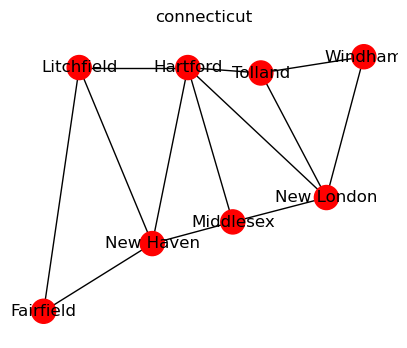

In [36]:
draw_map("connecticut", connecticut, (5,4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems

```
Required:
    backtracking: ?
    forward checking: ?
    degree heuristic: ?
    least contraining value: ?
Optional:    
    minimum remaining values: ?
```  

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`.

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement):

1. The variable selected and why.
2. The values proposed in order.
3. backtracking detected by forward checking (empty domains).


-----

## From the book

function BACKTRACKING-SEARCH(csp) returns a solution or failure
return BACKTRACK(csp, {})

```
function BACKTRACK(csp, assignment) returns a solution or failure
    if assignment is complete then return assignment
    var = SELECT-UNASSIGNED-VARIABLE(csp, assignment)
    for each value in ORDER-DOMAIN-VALUES(csp,var,assignment) do
    if value is consistent with assignment then
    add {var = value} to assignment
    inferences =  INFERENCE(csp,var,assignment)
    if inferences not equal failure then
    add inferences to csp
    result = BACKTRACK(csp, assignment)
    if result not equal failure then return result
    remove inferences from csp
    remove {var = value} from assignment
    return failure
```

function AC-3(csp) returns false if an inconsistency is found and true otherwise queue = a queue of arcs, initially all the arcs in csp

    ```
    while queue is not empty do
    (Xi, Xj) = POP(queue)
    if REVISE(csp, Xi, Xj) then
        if size of Di = 0 then return false
        for each Xk in Xi.NEIGHBORS - {Xj} do
            add (Xk, Xi) to queue
    return true
    ```
    ```
    function REVISE(csp, Xi, Xj) returns true iff we revise the domain of Xi
    revised = false
    for each x in Di do
    if no value y in Dj allows (x,y) to satisfy the constraint between Xi and Xj then
        delete x from Di
        revised = true
    return revised
    ```

In [37]:
def color_map(planar_map, color_list, trace=False):
    return [(n, "red") for n in planar_map["nodes"]]

## is_assignment_complete
**Description**: Checks if the assignment is complete by determining if all variables have been assigned a value.

### Args:
- **assignment (dict)**: A dictionary representing the current assignment of variables to values.
- **variables (list)**: A list of all variables that need to be assigned.

### Returns:
- **bool**: Returns `True` if all variables have been assigned, otherwise returns `False`.


In [38]:
def is_assignment_complete(assignment, variables):
        return len(assignment) == len(variables)

In [39]:
variables1 = ['X', 'Y', 'Z']
assignment1 = {'X': 1, 'Y': 2, 'Z': 3}
assert is_assignment_complete(assignment1, variables1) == True
variables2 = ['X', 'Y', 'Z']
assignment2 = {'X': 1, 'Y': 2}
assert is_assignment_complete(assignment2, variables2) == False
variables3 = ['X', 'Y', 'Z']
assignment3 = {}
assert is_assignment_complete(assignment3, variables3) == False

## is_valid
**Description**: Checks if assigning a given value to a variable is valid, ensuring that no neighboring variables are assigned the same value.

### Args:
- **var (any)**: The variable to check.
- **value (any)**: The value to assign to the variable.
- **assignment (dict)**: A dictionary representing the current assignment of variables to values.
- **neighbors (dict)**: A dictionary where keys are variables and values are lists of neighboring variables.

### Returns:
- **bool**: Returns `True` if the assignment is valid (i.e., no neighboring variable has the same value), otherwise returns `False`.


In [40]:
def is_valid(var, value, assignment, neighbors):
        for neighbor in neighbors[var]:
            if neighbor in assignment and assignment[neighbor] == value:
                return False
        return True

In [41]:
var1 = 'X'
value1 = 1
assignment1 = {'Y': 2}
neighbors1 = {'X': ['Y'], 'Y': ['X']}
assert type(is_valid(var1, value1, assignment1, neighbors1)) == bool
assert is_valid(var1, value1, assignment1, neighbors1) == True
var2 = 'X'
value2 = 1
assignment2 = {'Y': 1}
neighbors2 = {'X': ['Y'], 'Y': ['X']}
assert is_valid(var2, value2, assignment2, neighbors2) == False

## mrv_tie_breaker
**Description**: Selects a variable from the candidate list using the Minimum Remaining Values (MRV) heuristic, which prioritizes the variable with the smallest domain (i.e., the fewest possible values).

### Args:
- **candidates (list)**: A list of variables that are tied based on the degree heuristic.
- **domains (dict)**: A dictionary where keys are variables and values are lists of possible values for each variable.
- **trace (bool)**: If True, will print details of the selected variable based on MRV.

### Returns:
- **any**: The variable with the smallest domain size.

In [42]:
def mrv_tie_breaker(candidates, domains, trace):
        min_domain_size = None
        selected_var = None
        for var in candidates:
            domain_size = len(domains[var])
            if min_domain_size is None or domain_size < min_domain_size:
                min_domain_size = domain_size
                selected_var = var
        return selected_var

In [43]:
candidates1 = ['X']
domains1 = {'X': [1, 2], 'Y': [1], 'Z': [1, 2]}
trace1 = False
selected_var1 = mrv_tie_breaker(candidates1, domains1, trace1)
assert len(selected_var1) == 1
assert selected_var1 == 'X'
candidates2 = ['X', 'Y']
domains2 = {'X': [1, 2], 'Y': [1], 'Z': [1, 2]}
trace2 = False
selected_var2 = mrv_tie_breaker(candidates2, domains2, trace2)
assert selected_var2 == 'Y'

## degree_heuristic
**Description**: Selects the next unassigned variable using the degree heuristic. The degree heuristic prioritizes variables with the most unassigned neighbors. If there is a tie, the Minimum Remaining Values (MRV) heuristic is used to break the tie.

### Args:
- **variables (list)**: A list of variables that need to be assigned.
- **assignment (dict)**: A dictionary representing the current assignment of variables to values.
- **neighbors (dict)**: A dictionary where keys are variables and values are lists of neighboring variables.
- **domains (dict)**: A dictionary where keys are variables and values are lists of possible values.
- **trace (bool)**: If True, will print the selected variable along with a message indicating the use of the degree heuristic and the MRV tie-breaker if needed.

### Returns:
- **any**: The selected variable based on the degree heuristic, using MRV to break ties.

In [44]:
def degree_heuristic(variables, assignment, neighbors, domains, trace):
        unassigned_vars = []
        for v in variables:
            if v not in assignment:
                unassigned_vars.append(v)
        max_degree = -1
        candidates = []
        for var in unassigned_vars:
            degree = 0
            for neighbor in neighbors[var]:
                if neighbor not in assignment:
                    degree += 1
            if degree > max_degree:
                max_degree = degree
                candidates = [var]
            elif degree == max_degree:
                candidates.append(var)
        if len(candidates) == 1:
            selected_var = candidates[0]
        else:
            selected_var = mrv_tie_breaker(candidates, domains, trace)
        if trace:
            print("Variable selected:", selected_var, "(Degree Heuristic with MRV tie-breaker)")
        return selected_var

In [63]:
variables1 = ['X', 'Y', 'Z']
assignment1 = {'X': 1, 'Y': 2}
neighbors1 = {'X': ['Y'], 'Y': ['X', 'Z'], 'Z': ['Y']}
domains1 = {'X': [1, 2], 'Y': [1, 2], 'Z': [1, 2]}
trace1 = False
selected_var1 = degree_heuristic(variables1, assignment1, neighbors1, domains1, trace1)
assert len(selected_var1) == 1
assert selected_var1 == 'Z'
variables2 = ['X', 'Y', 'Z']
assignment2 = {}
neighbors2 = {'X': ['Y', 'Z'], 'Y': ['X', 'Z'], 'Z': ['X', 'Y']}
domains2 = {'X': [1, 2], 'Y': [1, 2], 'Z': [1, 2]}
trace2 = False
selected_var2 = degree_heuristic(variables2, assignment2, neighbors2, domains2, trace2)
assert selected_var2 == 'X'

## select_unassigned_variable
**Description**: Wrapper function for selecting the next variable.

### Args:
- **variables (list)**: A list of variables that need to be assigned.
- **assignment (dict)**: A dictionary representing the current assignment of variables to values.
- **neighbors (dict)**: A dictionary where keys are variables and values are lists of neighboring variables.
- **domains (dict)**: A dictionary where keys are variables and values are lists of possible values.
- **trace (bool)**: If True, will print details of the selected variable.

### Returns:
- **any**: The variable selected using the degree heuristic

In [45]:
def select_unassigned_variable(variables, assignment, neighbors, domains, trace):
        return degree_heuristic(variables, assignment, neighbors, domains, trace)

In [46]:
variables1 = ['X', 'Y', 'Z']
assignment1 = {'X': 1, 'Y': 2}
neighbors1 = {'X': ['Y'], 'Y': ['X', 'Z'], 'Z': ['Y']}
domains1 = {'X': [1, 2], 'Y': [1, 2], 'Z': [1, 2]}
trace1 = False

selected_var1 = select_unassigned_variable(variables1, assignment1, neighbors1, domains1, trace1)
assert selected_var1 == 'Z'

## least_constraining_value
**Description**: Determines the least constraining value (LCV) for a variable by sorting values based on how many constraints they place on neighboring variables.

### Args:
- **var**: The variable whose value is being determined.
- **assignment (dict)**: A dictionary of variables and their assigned values.
- **domains (dict)**: A dictionary where keys are variables and values are lists of possible values.
- **neighbors (dict)**: A dictionary where keys are variables and values are lists of neighboring variables.
- **trace (bool)**: If True, will print the ordered values for the variable based on the LCV heuristic.

### Returns:
- **list**: A list of values ordered from least constraining to most constraining for the given variable.

In [47]:
def least_constraining_value(var, assignment, domains, neighbors, trace):
        values = domains[var][:]
        value_constraints = []
        for value in values:
            count = 0
            for neighbor in neighbors[var]:
                if neighbor not in assignment and value in domains[neighbor]:
                    count += 1
            value_constraints.append((value, count))
        n = len(value_constraints)
        for i in range(n - 1):
            for j in range(n - i - 1):
                if value_constraints[j][1] > value_constraints[j + 1][1]:
                    value_constraints[j], value_constraints[j + 1] = value_constraints[j + 1], value_constraints[j]
        ordered_values = []
        for vc in value_constraints:
            ordered_values.append(vc[0])
        if trace:
            print("Values proposed for", var, ":", ordered_values, "(LCV heuristic)")
        return ordered_values

In [48]:
var1 = 'X'
assignment1 = {}
domains1 = {'X': [1, 2], 'Y': [1, 2], 'Z': [1, 2]}
neighbors1 = {'X': ['Y', 'Z'], 'Y': ['X'], 'Z': ['X']}
trace1 = False

ordered_values1 = least_constraining_value(var1, assignment1, domains1, neighbors1, trace1)
assert ordered_values1 == [1, 2] or ordered_values1 == [2, 1]

## forward_check
**Description**: Perform forward checking to ensure no variable has an empty domain after assigning a value.
    
### Args:
- **var**: The variable being assigned a value.
- **value**: The value being assigned to the variable.
- **assignment** (dict): A dictionary of variables and their assigned values.
- **domains** (dict): A dictionary where keys are variables and values are lists of possible values.
- **neighbors** (dict): A dictionary where keys are variables and values are lists of neighboring variables.
- **trace** (bool): If True, will print backtracking messages when a domain becomes empty.
    
### Returns:
- **tuple**: A boolean indicating whether forward checking succeeded, and the updated domains (or None if failed).

In [49]:
def forward_check(var, value, assignment, domains, neighbors, trace):
        new_domains = deepcopy(domains)
        for neighbor in neighbors[var]:
            if neighbor not in assignment:
                if value in new_domains[neighbor]:
                    new_domains[neighbor].remove(value)
                    if not new_domains[neighbor]:
                        if trace:
                            print("Backtracking: Empty domain for", neighbor, "after assigning", value, "to", var)
                        return False, None
        return True, new_domains

In [50]:
var1 = 'X'
value1 = 1
assignment1 = {'X': 1}
domains1 = {'X': [1, 2], 'Y': [1, 2], 'Z': [1, 2]}
neighbors1 = {'X': ['Y', 'Z'], 'Y': ['X'], 'Z': ['X']}
trace1 = False
result1, new_domains1 = forward_check(var1, value1, assignment1, domains1, neighbors1, trace1)
assert result1 == True
assert len(new_domains1) == 3
assert new_domains1 == {'X': [1, 2], 'Y': [2], 'Z': [2]}


## backtrack
**Description**: Recursively performs backtracking search to find a complete and valid assignment for the variables.

### Args:
- **assignment (dict)**: A dictionary representing the current assignment of variables to values.
- **variables (list)**: A list of variables to be assigned.
- **domains (dict)**: A dictionary where keys are variables and values are lists of possible values.
- **neighbors (dict)**: A dictionary where keys are variables and values are lists of neighboring variables.
- **trace (bool)**: If True, will print the steps of the backtracking process for debugging purposes.

### Returns:
- **dict**: A complete and valid assignment of variables, or None if no valid assignment is found.


In [51]:
def backtrack(assignment, variables, domains, neighbors, trace):
    if is_assignment_complete(assignment, variables):
        return assignment
    var = select_unassigned_variable(variables, assignment, neighbors, domains, trace)
    values = least_constraining_value(var, assignment, domains, neighbors, trace)
    for value in values:
        if is_valid(var, value, assignment, neighbors):
            new_assignment = assignment.copy()
            new_assignment[var] = value
            success, new_domains = forward_check(var, value, new_assignment, domains, neighbors, trace)
            if success:
                result = backtrack(new_assignment, variables, new_domains, neighbors, trace)
                if result:
                    return result
            else:
                if trace:
                    print("Backtracking from", var, "after trying value", value)
    return None

In [52]:
variables1 = ['X', 'Y']
domains1 = {'X': [1, 2], 'Y': [1, 2]}
neighbors1 = {'X': ['Y'], 'Y': ['X']}
assignment1 = {}
trace1 = False

result1 = backtrack(assignment1, variables1, domains1, neighbors1, trace1)
assert result1 == {'X': 1, 'Y': 2} or result1 == {'X': 2, 'Y': 1}

## color_map
**Description**: Solves the map-coloring problem for a planar map by assigning colors to each region such that no adjacent regions (nodes) share the same color.

### Args:
- **planar_map (dict)**: A dictionary representing the planar map with two keys:
  - **'nodes' (list)**: A list of nodes (regions) to be colored.
  - **'edges' (list of tuples)**: Each tuple represents an edge (connection) between two nodes.
- **color_list (list)**: A list of available colors to assign to the nodes.
- **trace (bool, optional)**: If `True`, prints tracing information during the backtracking process. Defaults to `False`.

### Returns:
- **list of tuples**: A list of tuples where each tuple contains a node and its assigned color. Returns `None` if no valid coloring is found.


In [53]:
def color_map(planar_map, color_list, trace=False):
    nodes = planar_map['nodes']
    edges = planar_map['edges']
    neighbors = {}
    for node in nodes:
        neighbors[node] = set()
    for edge in edges:
        a_index, b_index = edge
        a = nodes[a_index]
        b = nodes[b_index]
        neighbors[a].add(b)
        neighbors[b].add(a)
    variables = nodes[:]
    domains = {}
    for node in nodes:
        domains[node] = color_list[:]
    result = backtrack({}, variables, domains, neighbors, trace)
    if result is None:
        return None
    final_result = []
    for node in nodes:
        final_result.append((node, result[node]))
    return final_result


## Problem 1. Color Connecticut Using Your Solution

In [54]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=True)

Variable selected: Hartford (Degree Heuristic with MRV tie-breaker)
Values proposed for Hartford : ['red', 'blue', 'green', 'yellow'] (LCV heuristic)
Variable selected: New Haven (Degree Heuristic with MRV tie-breaker)
Values proposed for New Haven : ['blue', 'green', 'yellow'] (LCV heuristic)
Variable selected: New London (Degree Heuristic with MRV tie-breaker)
Values proposed for New London : ['blue', 'green', 'yellow'] (LCV heuristic)
Variable selected: Litchfield (Degree Heuristic with MRV tie-breaker)
Values proposed for Litchfield : ['green', 'yellow'] (LCV heuristic)
Variable selected: Tolland (Degree Heuristic with MRV tie-breaker)
Values proposed for Tolland : ['green', 'yellow'] (LCV heuristic)
Variable selected: Fairfield (Degree Heuristic with MRV tie-breaker)
Values proposed for Fairfield : ['red', 'yellow'] (LCV heuristic)
Variable selected: Windham (Degree Heuristic with MRV tie-breaker)
Values proposed for Windham : ['red', 'yellow'] (LCV heuristic)
Variable selected: M

Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

<a id="four_ct"></a>
#### Test Cases

In [55]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

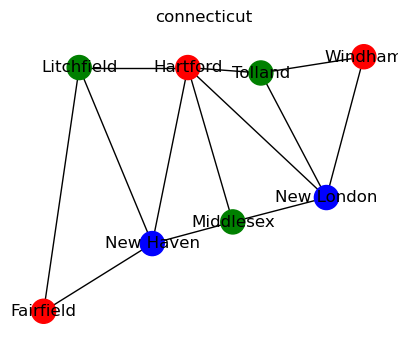

In [56]:
draw_map("connecticut", connecticut, (5,4), connecticut_colors)

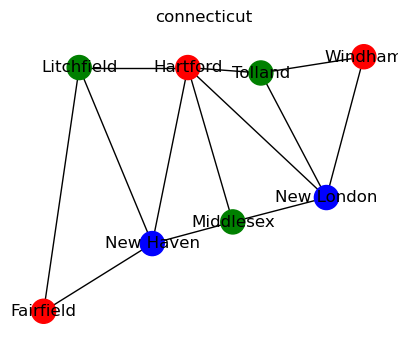

In [57]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=False)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5,4), connecticut_colors)

In [58]:
europe = {
    'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57),
                 (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32),
                 (94, 97), (143, 149), (140, 111), (110, 67), (127, 40),
                 (118, 47), (111, 54), (189, 39), (202, 33), (82, 74),
                 (110, 162), (137, 102), (93, 55), (125, 32), (128, 37),
                 (122, 42), (116, 53), (124, 65), (146, 87), (138, 54),
                 (137, 41), (64, 90), (130, 22), (168, 29), (78, 55),
                 (116, 144), (122, 57), (158, 65), (122, 78), (112, 60),
                 (127, 48), (191, 118), (100, 78), (102, 35)],
 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22),
           (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24),
           (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12),
           (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37),
           (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23),
           (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30),
           (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 39),
           (15, 41), (15, 29), (41, 4), (41, 24), (41, 45), (41, 18), (41, 38),
           (41, 29), (4, 24), (24, 45), (45, 1), (45, 34), (45, 25), (45, 27),
           (45, 17), (45, 28), (45, 18), (34, 25), (34, 26), (34, 32), (34, 6),
           (34, 35), (25, 26), (25, 16), (25, 27), (26, 16), (26, 42), (26, 32),
           (16, 27), (16, 42), (27, 17), (27, 42), (17, 42), (17, 28), (42, 28),
           (42, 38), (42, 31), (42, 32), (28, 18), (28, 38), (18, 38), (38, 29),
           (38, 39), (38, 31), (29, 39), (30, 39), (30, 43), (39, 5), (39, 31),
           (39, 43), (5, 31), (31, 32), (32, 35), (6, 35), (35, 19), (35, 11),
           (35, 20), (19, 11), (19, 20), (19, 43), (11, 20), (20, 43)],
 'nodes': ['Portugal', 'Malta', 'Iceland', 'Ireland', 'Liechtenstein',
           'Moldova', 'Cyprus', 'Spain', 'Netherlands', 'Luxembourg',
           'Lithuania', 'Armenia', 'Denmark', 'Finland', 'Estonia',
           'Czech Republic', 'Kosovo', 'Bosnia Herzegovina', 'Slovenia',
           'Georgia', 'Azerbaijan', 'Belgium', 'Norway', 'Latvia',
           'Switzerland', 'Albania', 'Macedonia', 'Montenegro', 'Croatia',
           'Slovakia', 'Belarus', 'Romania', 'Bulgaria', 'United Kingdom',
           'Greece', 'Turkey', 'France', 'Sweden', 'Hungary', 'Ukraine',
           'Poland', 'Austria', 'Serbia', 'Russia', 'Germany', 'Italy']}
print(europe)

{'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57), (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32), (94, 97), (143, 149), (140, 111), (110, 67), (127, 40), (118, 47), (111, 54), (189, 39), (202, 33), (82, 74), (110, 162), (137, 102), (93, 55), (125, 32), (128, 37), (122, 42), (116, 53), (124, 65), (146, 87), (138, 54), (137, 41), (64, 90), (130, 22), (168, 29), (78, 55), (116, 144), (122, 57), (158, 65), (122, 78), (112, 60), (127, 48), (191, 118), (100, 78), (102, 35)], 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22), (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24), (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12), (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37), (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23), (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30), (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 

In [59]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=True)

Variable selected: Italy (Degree Heuristic with MRV tie-breaker)
Values proposed for Italy : ['red', 'blue', 'green', 'yellow'] (LCV heuristic)
Variable selected: Germany (Degree Heuristic with MRV tie-breaker)
Values proposed for Germany : ['red', 'blue', 'green', 'yellow'] (LCV heuristic)
Variable selected: Serbia (Degree Heuristic with MRV tie-breaker)
Values proposed for Serbia : ['red', 'blue', 'green', 'yellow'] (LCV heuristic)
Variable selected: Russia (Degree Heuristic with MRV tie-breaker)
Values proposed for Russia : ['red', 'blue', 'green', 'yellow'] (LCV heuristic)
Variable selected: Poland (Degree Heuristic with MRV tie-breaker)
Values proposed for Poland : ['blue', 'green', 'yellow'] (LCV heuristic)
Variable selected: Hungary (Degree Heuristic with MRV tie-breaker)
Values proposed for Hungary : ['blue', 'green', 'yellow'] (LCV heuristic)
Variable selected: United Kingdom (Degree Heuristic with MRV tie-breaker)
Values proposed for United Kingdom : ['red', 'blue', 'green', 

Here we're testing to see if the adjacent nodes are colored differently:

<a id="four_eu"></a>
#### Test Cases

In [60]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

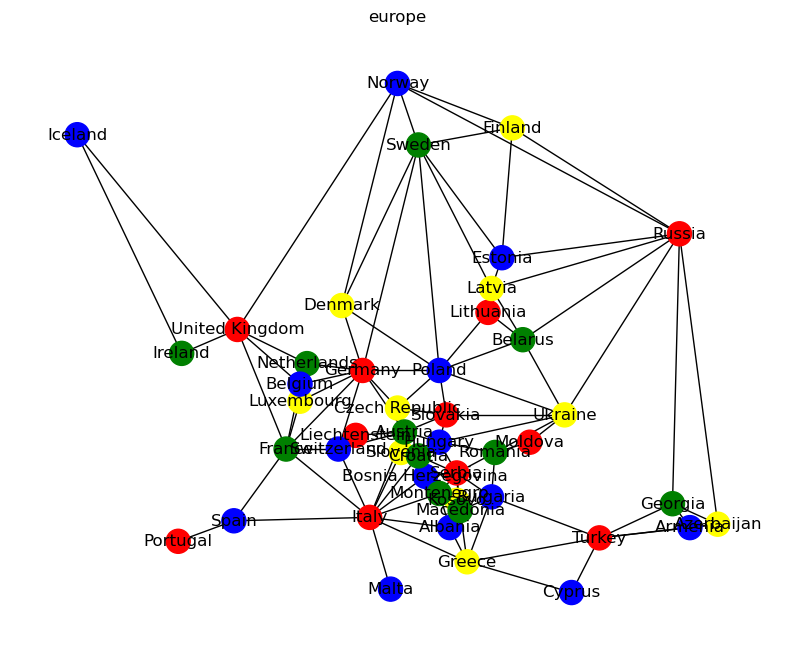

In [61]:
draw_map("europe", europe, (10,8), europe_colors)

In [62]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=False)
if europe_colors:
     draw_map("europe", europe, (10,8), europe_colors)